In [277]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# for Box-Cox Transformation
from scipy import stats
import datetime

In [278]:
raw_data = pd.read_csv('DataFrame.csv')

In [279]:
raw_data.head(5)

,Type,Date,Time,open,high,low,close,Unnamed: 7
0,NIFTY,20210101,09:16,13997.90,14020.85,13991.35,14013.15,NaN
1,NIFTY,20210101,09:17,14014.85,14018.55,14008.15,14009.05,NaN
2,NIFTY,20210101,09:18,14008.05,14013.10,14005.05,14012.70,NaN
3,NIFTY,20210101,09:19,14013.65,14019.10,14013.65,14016.20,NaN
4,NIFTY,20210101,09:20,14015.45,14017.80,14011.95,14015.45,NaN


In [280]:
raw_data.shape

(22805, 8)

In [281]:
raw_data['Type'].unique()

array(['NIFTY'], dtype=object)

In [282]:
raw_data['Unnamed: 7'].unique()

array([nan])

In [283]:
raw_data.describe()

,Date,open,high,low,close,Unnamed: 7
count,2.280500e+04,22805.000000,22805.000000,22805.000000,22805.000000,0.0
mean,2.021022e+07,14703.322396,14707.486481,14699.102201,14703.260816,NaN
std,8.285616e+01,391.377498,391.265231,391.551643,391.366248,NaN
min,2.021010e+07,13604.750000,13614.400000,13596.750000,13602.800000,NaN
25%,2.021012e+07,14462.250000,14465.950000,14458.050000,14461.950000,NaN
50%,2.021022e+07,14739.500000,14743.000000,14735.850000,14739.450000,NaN
75%,2.021031e+07,15037.000000,15041.250000,15032.500000,15036.850000,NaN
max,2.021033e+07,15429.500000,15431.750000,15427.900000,15430.200000,NaN


In [284]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22805 entries, 0 to 22804
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Type        22805 non-null  object 
 1   Date        22805 non-null  int64  
 2   Time        22805 non-null  object 
 3   open        22805 non-null  float64
 4   high        22805 non-null  float64
 5   low         22805 non-null  float64
 6   close       22805 non-null  float64
 7   Unnamed: 7  0 non-null      float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.4+ MB


In [285]:
raw_data.isnull().sum()

Type              0
Date              0
Time              0
open              0
high              0
low               0
close             0
Unnamed: 7    22805
dtype: int64

In [286]:
data_drop = raw_data.drop(['Unnamed: 7','Type'],axis=1)

In [287]:
#landslides['date_parsed'] = pd.to_datetime(landslides['date'], format="%m/%d/%y")
data_drop['Date'] = pd.to_datetime(data_drop['Date'], format="%Y%m%d")
data_drop = data_drop.set_index('Time')

In [288]:
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22805 entries, 09:16 to 15:31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    22805 non-null  datetime64[ns]
 1   open    22805 non-null  float64       
 2   high    22805 non-null  float64       
 3   low     22805 non-null  float64       
 4   close   22805 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.0+ MB


In [289]:
data_cleaned = data_drop.rename(columns={'Date':'date'})

In [290]:
data_cleaned.set_index('date',inplace=True)

In [291]:
data_cleaned.head(5)

,open,high,low,close
date,,,,
2021-01-01,13997.90,14020.85,13991.35,14013.15
2021-01-01,14014.85,14018.55,14008.15,14009.05
2021-01-01,14008.05,14013.10,14005.05,14012.70
2021-01-01,14013.65,14019.10,14013.65,14016.20
2021-01-01,14015.45,14017.80,14011.95,14015.45


##### Data visualization

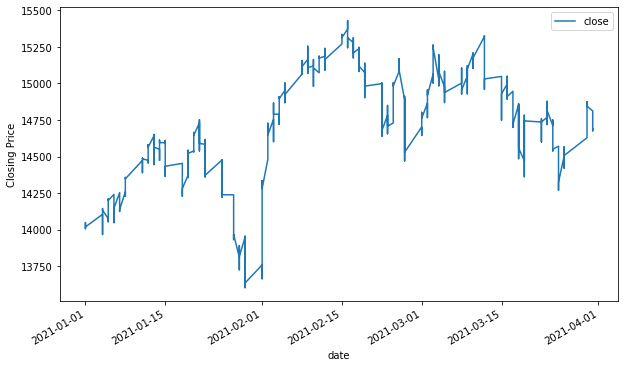

In [292]:
df_close = data_cleaned['close']
plt.figure(figsize=(10,6))
df_close.plot()
plt.ylabel('Closing Price')
plt.legend()
plt.savefig('lineplot.png')

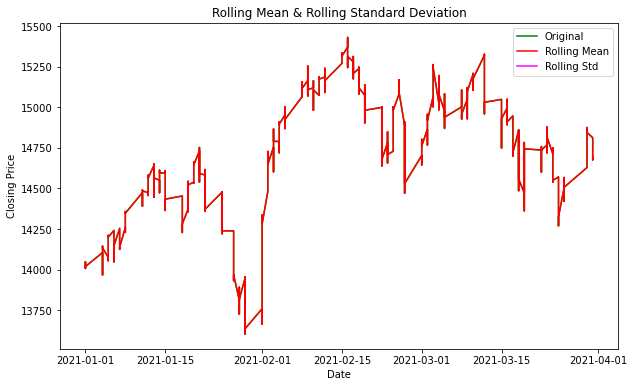

In [339]:
rolling_mean = df_close.rolling(window = 1).mean()
rolling_std = df_close.rolling(window = 1).std()
plt.figure(figsize=(10,6))
plt.plot(df_close, color = 'green', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'magenta', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()

In [336]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_close)
print('ADF Statistics: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
for key, value in result[4].items():
    print('Critical Values Over {}: {}'.format(key, value))

ADF Statistics: -2.126148779260194
p-value: 0.2341308515461299
Critical Values Over 1%: -3.430636931803934
Critical Values Over 5%: -2.861666814628871
Critical Values Over 10%: -2.5668374998130825


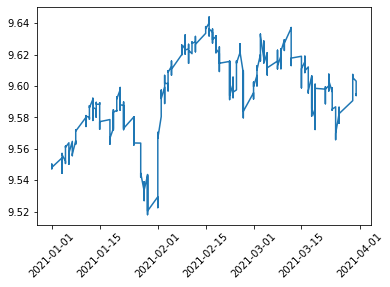

In [311]:
df_log = np.log(df_close)
plt.plot(df_log)
plt.xticks(rotation=45)
plt.show()

In [316]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window = 1).mean()
    rolling_std = timeseries.rolling(window = 1).std()
    
    #rolling statistics plot
    plt.figure(figsize=(10,6))
    plt.plot(timeseries, color = 'green', label = 'Original')
    plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rolling_std, color = 'magenta', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Rolling Standard Deviation')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    
    # Dickey–Fuller test:
    adf_test = adfuller(timeseries)
    print('ADF Statistic: {}'.format(adf_test[0]))
    print('p-value: {}'.format(adf_test [1]))
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print('Critical Values Over {}: {}'.format(key, value))

ADF Statistic: -2.1349024292094603
p-value: 0.23071365598070998
Critical Values:
Critical Values Over 1%: -3.430636931803934
Critical Values Over 5%: -2.861666814628871
Critical Values Over 10%: -2.5668374998130825


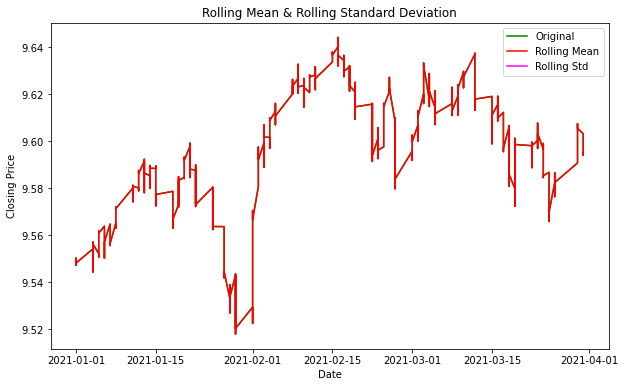

In [317]:
get_stationarity(df_log)

ADF Statistic: -6.0939560297970266
p-value: 1.0206302019137448e-07
Critical Values:
Critical Values Over 1%: -3.4306415889501976
Critical Values Over 5%: -2.861668872836643
Critical Values Over 10%: -2.5668385953559967


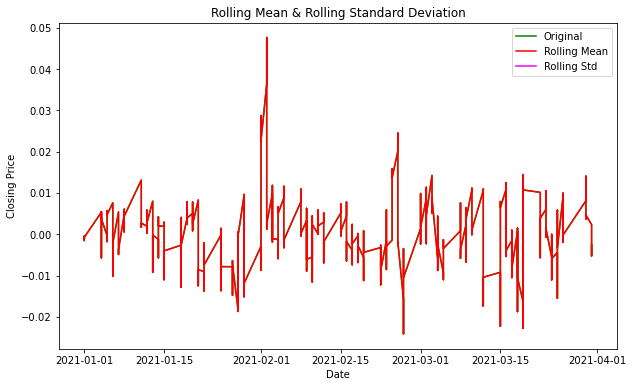

In [318]:
rolling_mean = df_log.rolling(window=365).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)
plt.savefig('Rolling mean subtracted log values graph')

ADF Statistic: -4.0377213000242245
p-value: 0.0012253743341658488
Critical Values:
Critical Values Over 1%: -3.430636931803934
Critical Values Over 5%: -2.861666814628871
Critical Values Over 10%: -2.5668374998130825


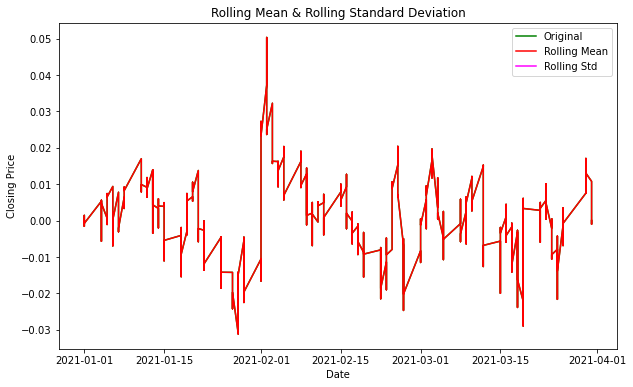

In [319]:
rolling_mean_exp_decay = df_log.ewm(halflife=365, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)
plt.savefig('Mean exponential decay subtracted log values graph')

ADF Statistic: -46.2024591186365
p-value: 0.0
Critical Values:
Critical Values Over 1%: -3.430636931803934
Critical Values Over 5%: -2.861666814628871
Critical Values Over 10%: -2.5668374998130825


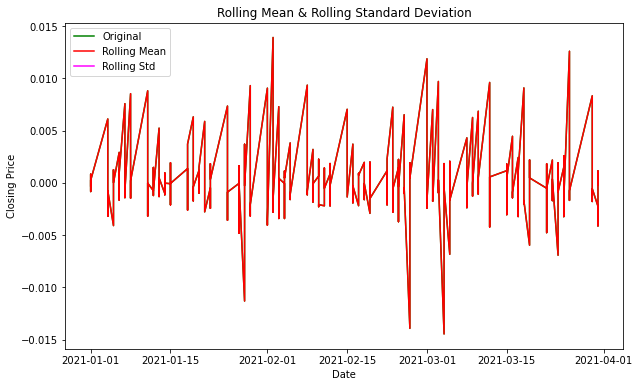

In [320]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)
plt.savefig('Shift subtracted log values graph')